<a href="https://colab.research.google.com/github/JackCurragh/RDG-Viewer/blob/main/RDG_Viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDG-Viewer

Visualise Ribosome Decision Graphs in your browser using this colab notebook.

This notebook utilises the plotting functionality of the `RDG` python [package](https://github.com/JackCurragh/RDG). This package is under active development with the goal of being a basic toolkit for carrying out Ribosome Decision Graph based analysis.

In [ ]:
#@title 1. Setup

#@markdown Install the required dependencies for Ribosome Decision Graph
#@markdown visualisation

#@markdown Run this step by clicking the <b>Play</b> button on the left

!pip install -q sqlitedict matplotlib networkx;
!pip install -q git+https://github.com/JackCurragh/RDG.git;

from RDG import plot, RDG

no_node_color_dict = {
    "edge_colors": {
        "frame0": "#ffbb8d",
        "frame1": "#ffeedd",
        "frame2": "#ffd8be"
        },
    "node_colors": {
        "startpoint": "#000000",
        "endpoint": "#000000",
        "translation_start": "#00b050",
        "translation_stop": "#000000",
        "frameshift": "#000000",
    },
}

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


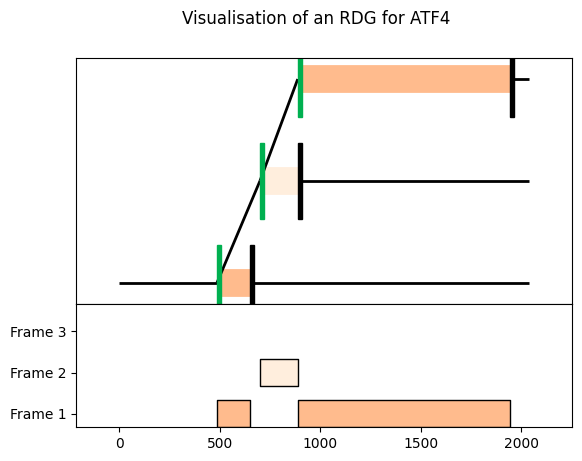

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [ ]:
#@title 2. Build & Visualise Ribosome Decsion Graph

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Depending on the rules/assumptions made during graph construction we
#@markdown will obtain greatly differnt graphs. Fill in the fields below to
#@markdown set the 'rules' for this graph as well as other visualisation paramaters

Locus_Name = "ATF4"  #@param {type:"string"}
Transcript_length = 2041 #@param {type:"integer"}

Allow_reinitiation = False #@param {type:"boolean"}

#@markdown Input Translon start and stop coordinates in the form
#@markdown "Start Position, Stop Position". Example  `100, 500`

#@markdown Leave a field blank if you do not require all 5 Translons

#@markdown <b>Note:</b> the quotation marks look after themselves
Translon_1 = "486, 649"  #@param {type:"string"}
Translon_2 = "700, 891"  #@param {type:"string"}
Translon_3 = "888, 1943"  #@param {type:"string"}
Translon_4 = ""  #@param {type:"string"}
Translon_5 = ""  #@param {type:"string"}

Translons = {
    "Translon 1": Translon_1,
    "Translon 2": Translon_2,
    "Translon 3": Translon_3,
    "Translon 4": Translon_4,
    "Translon 5": Translon_5,
    }

g = RDG(name=Locus_Name, locus_stop=Transcript_length)


for translon in Translons:
  if Translons[translon] != "":
    try:
      start_stop = [int(i) for i in Translons[translon].split(", ")]
    except:
      raise Exception("Translon 1 Start or Stop Codon position is invalid")

    g.add_open_reading_frame(
        start_codon_position=int(start_stop[0]),
        stop_codon_position=int(start_stop[1]),
        reinitiation=Allow_reinitiation
        )

plot(g, color_dict=no_node_color_dict)

In [ ]:
#@title 2 v2. Build Visualise Ribosome Decsion Graph

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Depending on the rules/assumptions made during graph construction we
#@markdown will obtain greatly differnt graphs. Fill in the fields below to
#@markdown set the 'rules' for this graph as well as other visualisation paramaters

Locus_Name = "ATF4"  #@param {type:"string"}
Transcript_length = 2041 #@param {type:"integer"}

Allow_reinitiation = True #@param {type:"boolean"}


import ipywidgets as widgets

t1 = widgets.FloatRangeSlider(
    value=[486, 649],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t2 = widgets.FloatRangeSlider(
    value=[700, 891],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t3 = widgets.FloatRangeSlider(
    value=[888, 1943],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 3:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t4 = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 4:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
t5 = widgets.FloatRangeSlider(
    value=[0, 0],
    min=0,
    max=Transcript_length,
    step=1,
    description='Translon 5:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    layout=widgets.Layout(width='50%', height='40px')
)
display(t1, t2, t3, t4, t5)


FloatRangeSlider(value=(486.0, 649.0), continuous_update=False, description='Translon 1:', layout=Layout(heigh…

FloatRangeSlider(value=(700.0, 891.0), continuous_update=False, description='Translon 2:', layout=Layout(heigh…

FloatRangeSlider(value=(888.0, 1943.0), continuous_update=False, description='Translon 3:', layout=Layout(heig…

FloatRangeSlider(value=(0.0, 0.0), continuous_update=False, description='Translon 4:', layout=Layout(height='4…

FloatRangeSlider(value=(0.0, 0.0), continuous_update=False, description='Translon 5:', layout=Layout(height='4…

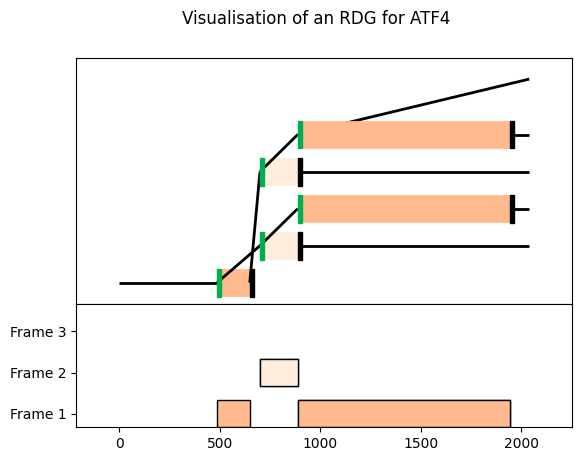

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [ ]:
#@title Once you have set your Translon ranges it <b>Play</b> to render the graph!

Translons = {
    "Translon 1": t1.value,
    "Translon 2": t2.value,
    "Translon 3": t3.value,
    "Translon 4": t4.value,
    "Translon 5": t5.value,
    }

g = RDG(name=Locus_Name, locus_stop=Transcript_length)

for translon in Translons:
  if Translons[translon][0] != Translons[translon][1]:
    g.add_open_reading_frame(
        start_codon_position=int(Translons[translon][0]),
        stop_codon_position=int(Translons[translon][1]),
        reinitiation=Allow_reinitiation
        )

plot(g, color_dict=no_node_color_dict)

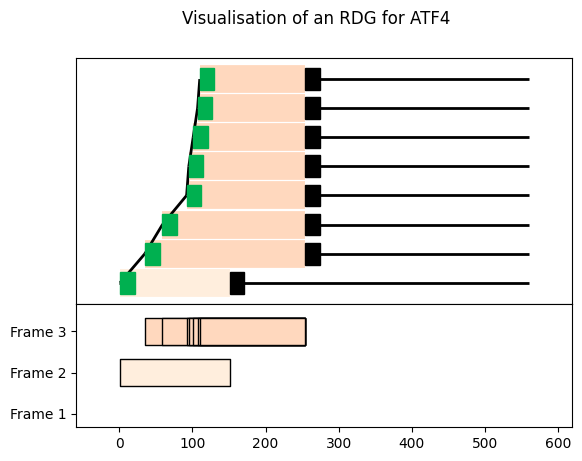

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

In [ ]:
#@title 3. Build Visualise Ribosome Decsion Graph - From Sequence

#@markdown Executing this cell using the <b>Play</b> button on the left will
#@markdown render a RDG visualisation below.

#@markdown Provide transcript sequence and specified graph construction
#@markdown paramaters below:

from RDG.sequence_to_RDG import extract_orfs

Locus_Name = "ATF4"  #@param {type:"string"}

#@markdown Transcript Sequence (No FASTA Header):
sequence = "ACTGCGCCCTCGGTCCGCCCCAGATCATCCGCCAGCTGGAGAACAACATCGAGAAGACAATGATCAAGATCATCACCAGCCAGAACATCCACCTGCTGTATTTGGACCTGCTGGATTATCTGAAGACAGTGCTGGCAGGATACCCCATTGAGCTGGACAAGCTGCAGAACCTCGTGGTCAACTACTGCTCAGAGCTGTCGGATATGAAGATCATGTCCCAAGATGCCATGATGATCACGGATGAGGTCAAGTGAAGATAGTGATCCGGGGAGACAGGAACACGGGCAAGACAGCGCTGTGGCACCGCCTGCAGGGCCGGCCGTTCGTGGAGGAGTACATCCCCACACAGGAGATCCAGGTCACCAGCATCCACTGGAGCTACAAGACCACGGATGACATCGTGAAGGTTGAAGTCTGGGATGTAGTAGACAAAGGAAAATGCAAAAAGCGAGGCGACGGCTTAAAGATGGAGAACGACCCCCAGGAGGCGGAGTCTGAAATGGCCCTGGATGCTGAGTTCCTGGACGTGTACAAGAACTGCAACGGGGTGGTCATGATGTT" #@param {type:"string"}

#@markdown Start Codons to Consider:
start_codons = "ATG,CTG,TTG" #@param {type:"string"}

#@markdown Number of Start Codons at which the Ribosome will initiate:
Number_of_Starts = 8 #@param {type:"integer"}

#@markdown Max number of Translons on reinitiation path
reinitiation_limit = 3 #@param {type:"integer"}
Allow_reinitiation = True #@param {type:"boolean"}

orfs = extract_orfs(sequence, starts=start_codons, min_length=0)
dg = RDG(name=Locus_Name, locus_stop=len(sequence))

for orf_start, orf_stop in sorted(orfs)[:Number_of_Starts]:
    dg.add_open_reading_frame(
        orf_start,
        orf_stop,
        reinitiation=Allow_reinitiation,
        upstream_limit=reinitiation_limit,
    )

plot(dg, color_dict=no_node_color_dict)